В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [4]:
df = pd.read_csv('/Users/s1ndly/Data Analytics/data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [5]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [26]:
dtypes_df = df.dtypes

In [19]:
# OR
df.info(memory_usage=True, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   datetime    object 
 1   season      int64  
 2   holiday     int64  
 3   workingday  int64  
 4   weather     int64  
 5   temp        float64
 6   atemp       float64
 7   humidity    int64  
 8   windspeed   float64
 9   casual      int64  
 10  registered  int64  
 11  count       int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [22]:
df.shape

(10886, 12)

In [31]:
print(memory_usage_df)

Index            132
datetime      740248
season         87088
holiday        87088
workingday     87088
weather        87088
temp           87088
atemp          87088
humidity       87088
windspeed      87088
casual         87088
registered     87088
count          87088
dtype: int64


In [42]:
task2 = pd.DataFrame({
    'Data type': dtypes_df,
    'Memory Usage (mb)': (memory_usage_df / (1024 ** 2)).round(3)
})
task2

,Data type,Memory Usage (mb)
datetime,object,0.706
season,int64,0.083
holiday,int64,0.083
workingday,int64,0.083
weather,int64,0.083
temp,float64,0.083
atemp,float64,0.083
humidity,int64,0.083
windspeed,float64,0.083
casual,int64,0.083


In [32]:
memory_usage_df = df.memory_usage(deep=True, index=False)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [75]:
df['datetime'] = pd.to_datetime(df.datetime)

In [47]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df['Hour'] = pd.to_datetime((df.datetime = pd.to_datetime(format='')))

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

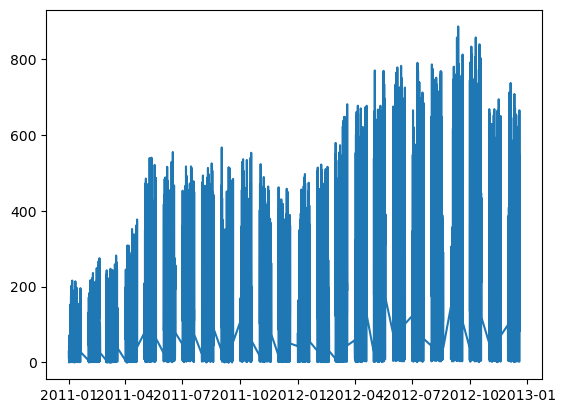

In [54]:
plt.plot(df.datetime, df.registered);

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [55]:
df['date'] = df.datetime.dt.date

In [61]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [77]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()
df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

З 2011 по 2012 рік додаток тільки з'явився на ринку, ми бачимо збільшення рівня зареєстрованих користувачів, хоча з незначними низькими коливаннями показниками, які могли виникнути як через сезонність, так і через погоду, низьку температуру. 
З 2012 по 2013 рік додаток досяг Maturity Stage на ринку, тому зростання зареєстрованих користувачів стабілізувалося. Маркетинг мог бути не зовсім ефективним
З 2013 року кореляція користувачів стає менш позитивною. Це могло статися через появу нових конкурентів на ринку, які забирали трафік нових користувачів. Також могли вплинути погодні умови: зима.

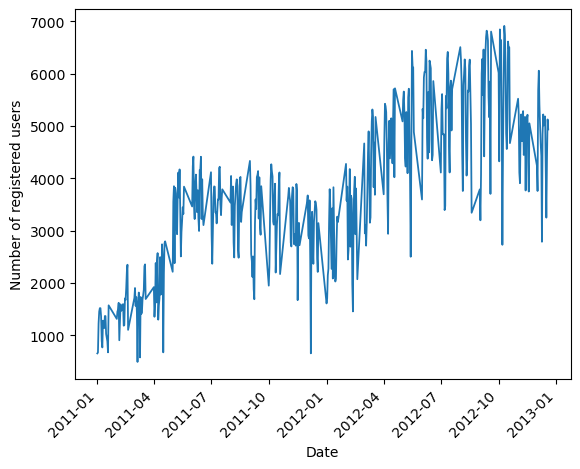

In [90]:
plt.plot(df_registered_by_date.date, df_registered_by_date.registered, linewidth=1.275)
plt.xlabel('Date')
plt.ylabel('Number of registered users')
plt.xticks(rotation=45, ha='right');

In [97]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

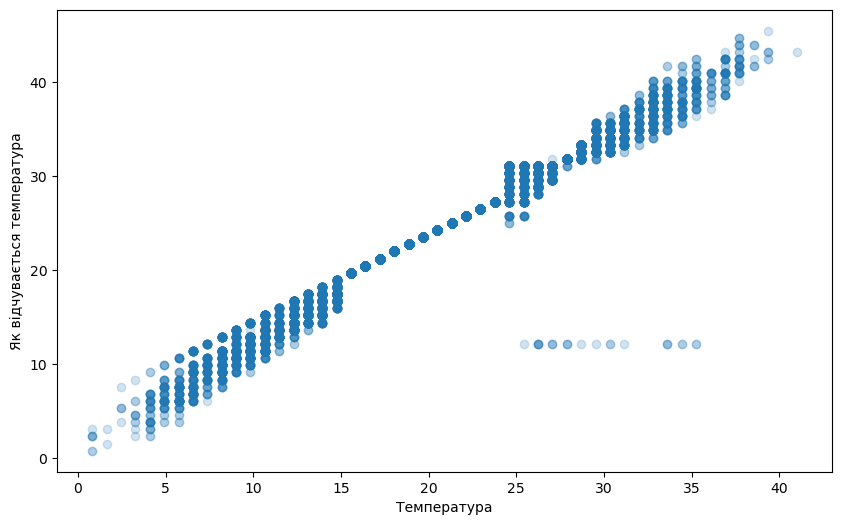

In [130]:
plt.figure(figsize=(10,6))
plt.scatter(df.temp, df.atemp, alpha=0.2)

plt.xlabel('Температура')
plt.ylabel('Як відчувається температура')

plt.show();

We can spot a few outliers in the data, which might influence outcomes of the analysis. Hence, we need to clean the data

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)
